## Setting Up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import time

pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_columns', 999)

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

C:\Users\Colin\AppData\Local\Temp\ipykernel_7608\3472058481.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('hotel_bookings.csv')


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03


In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   hotel                            119390 non-null  object 
 1   is_canceled                      119390 non-null  int64  
 2   lead_time                        119390 non-null  int64  
 3   arrival_date_year                119390 non-null  int64  
 4   arrival_date_month               119390 non-null  object 
 5   arrival_date_week_number         119390 non-null  int64  
 6   arrival_date_day_of_month        119390 non-null  int64  
 7   stays_in_weekend_nights          119390 non-null  int64  
 8   stays_in_week_nights             119390 non-null  int64  
 9   adults                           119390 non-null  int64  
 10  children                         119390 non-null  object 
 11  babies                           119390 non-null  int64  
 12  me

I am going to change the types of the columns to use less memory. Not super necessary here since my dataset isn't that big but on massive datasets this could be crucial.

In [4]:
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')

for col in df.select_dtypes(include=['float64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='float')

#Reduce size of object columns
#If the unique values are less than 50% of the total, convert them to category
for col in df.select_dtypes(include=['object']).columns:
    num_unique_values = df[col].nunique()
    num_total_values = len(df[col])
    
    if num_unique_values / num_total_values < 0.5:
        df[col] = df[col].astype('category')

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   hotel                            119390 non-null  category
 1   is_canceled                      119390 non-null  int8    
 2   lead_time                        119390 non-null  int16   
 3   arrival_date_year                119390 non-null  int16   
 4   arrival_date_month               119390 non-null  category
 5   arrival_date_week_number         119390 non-null  int8    
 6   arrival_date_day_of_month        119390 non-null  int8    
 7   stays_in_weekend_nights          119390 non-null  int8    
 8   stays_in_week_nights             119390 non-null  int8    
 9   adults                           119390 non-null  int8    
 10  children                         119390 non-null  category
 11  babies                           119390 non-null  in

## EDA
### + data cleaning

In [5]:
df.isnull().sum()

hotel                              0
is_canceled                        0
lead_time                          0
arrival_date_year                  0
arrival_date_month                 0
arrival_date_week_number           0
arrival_date_day_of_month          0
stays_in_weekend_nights            0
stays_in_week_nights               0
adults                             0
children                           0
babies                             0
meal                               0
country                            0
market_segment                     0
distribution_channel               0
is_repeated_guest                  0
previous_cancellations             0
previous_bookings_not_canceled     0
reserved_room_type                 0
assigned_room_type                 0
booking_changes                    0
deposit_type                       0
agent                              0
company                            0
days_in_waiting_list               0
customer_type                      0
a

In [6]:
df.duplicated().sum()

np.int64(31981)

No null values which is nice, but quite a lot of duplicate records...

In [7]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250,NULL,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NULL,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240,NULL,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


Additionally, there is some white space in the columns

In [8]:
df.columns

Index(['hotel        ', 'is_canceled ', 'lead_time ', 'arrival_date_year ',
       'arrival_date_month ', 'arrival_date_week_number ',
       'arrival_date_day_of_month ', 'stays_in_weekend_nights ',
       'stays_in_week_nights ', 'adults ', 'children ', 'babies ',
       'meal      ', 'country ', 'market_segment ', 'distribution_channel ',
       'is_repeated_guest ', 'previous_cancellations ',
       'previous_bookings_not_canceled ', 'reserved_room_type ',
       'assigned_room_type ', 'booking_changes ', 'deposit_type ', 'agent ',
       'company ', 'days_in_waiting_list ', 'customer_type   ', 'adr    ',
       'required_car_parking_spaces ', 'total_of_special_requests ',
       'reservation_status ', 'reservation_status_date'],
      dtype='object')

In [9]:
df.columns = df.columns.str.strip()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

In [10]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
num_columns = ['lead_time', 'previous_cancellations', 
               'is_repeated_guest', 'total_of_special_requests', 
               'stays_in_weekend_nights', 'stays_in_week_nights', 
               'adults', 'children', 'babies', 'days_in_waiting_list', 'booking_changes',]

for col in num_columns:
    non_numeric = df[col][pd.to_numeric(df[col], errors='coerce').isna()]
    if not non_numeric.empty:
        print(f"Non-numeric values found in column {col}: {non_numeric.unique()}")

Non-numeric values found in column children: ['NA       ']
Categories (10, object): [0, 1, 2, 3, ..., '1        ', '2        ', '3        ', 'NA       ']


And some null values that are formatted wierdly as well as more white space

In [12]:
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].str.strip()
    df[col] = df[col].replace('NA', np.nan)
    df[col] = df[col].fillna(0)

In [13]:
for col in num_columns:
    non_numeric = df[col][pd.to_numeric(df[col], errors='coerce').isna()]
    if not non_numeric.empty:
        print(f"Non-numeric values found in column {col}: {non_numeric.unique()}")

And then I need to turn Children back to a int type

In [14]:
df['children'] = df['children'].astype('int8')

In [15]:
df['children'].dtypes

dtype('int8')

In [16]:
duplicates_mask = df.duplicated(keep=False)
duplicates = df[duplicates_mask]
duplicates.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [17]:
duplicates_sorted = duplicates.sort_values(by=['hotel', 'lead_time', 'is_canceled', 'assigned_room_type', 'adr'])
duplicates_sorted

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
81490,City Hotel,0,0,2017,January,4,26,0,1,1,0,0,BB,PRT,Complementary,Direct,1,0,9,A,A,0,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2017-01-27
81491,City Hotel,0,0,2017,January,4,26,0,1,1,0,0,BB,PRT,Complementary,Direct,1,0,9,A,A,0,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2017-01-27
85431,City Hotel,0,0,2016,March,12,15,0,0,2,0,0,BB,PRT,Complementary,Direct,1,0,0,A,A,0,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2016-03-15
85432,City Hotel,0,0,2016,March,12,15,0,0,2,0,0,BB,PRT,Complementary,Direct,1,0,0,A,A,0,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2016-03-15
85433,City Hotel,0,0,2016,March,12,15,0,0,2,0,0,BB,PRT,Complementary,Direct,1,0,0,A,A,0,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2016-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28424,Resort Hotel,0,542,2016,September,40,26,2,5,2,0,0,HB,GBR,Groups,TA/TO,0,0,0,A,D,0,No Deposit,253,NULL,0,Transient-Party,70.00,0,0,Check-Out,2016-10-03
8397,Resort Hotel,0,542,2016,September,40,26,2,5,2,0,0,HB,GBR,Groups,TA/TO,0,0,0,E,E,0,No Deposit,253,NULL,0,Transient-Party,87.00,0,3,Check-Out,2016-10-03
8422,Resort Hotel,0,542,2016,September,40,26,2,5,2,0,0,HB,GBR,Groups,TA/TO,0,0,0,E,E,0,No Deposit,253,NULL,0,Transient-Party,87.00,0,3,Check-Out,2016-10-03
8421,Resort Hotel,0,542,2016,September,40,26,2,5,2,0,0,HB,GBR,Groups,TA/TO,0,0,0,E,E,0,No Deposit,253,NULL,0,Transient-Party,89.00,0,2,Check-Out,2016-10-03


Looks like the duplicates are all exactly the same so I think removing them is a good idea even though its around 1/4 of the dataset

In [18]:
df = df.drop_duplicates(keep='first')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


Now that those duplicates are gone, I can move to using `.describe()`

In [19]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,"87,371.00","87,371.00","87,371.00","87,371.00","87,371.00","87,371.00","87,371.00","87,371.00","87,371.00","87,371.00","87,371.00","87,371.00","87,371.00","87,371.00","87,371.00","87,371.00","87,371.00","87,371.00"
mean,0.27,79.88,"2,016.21",26.84,15.81,1.01,2.63,1.88,0.02,0.01,0.04,0.03,0.18,0.27,0.75,106.33,0.08,0.70
std,0.45,86.05,0.69,13.68,8.83,1.03,2.05,0.63,0.17,0.11,0.19,0.37,1.73,0.73,10.00,55.02,0.28,0.83
min,0.00,0.00,"2,015.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-6.38,0.00,0.00
25%,0.00,11.00,"2,016.00",16.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72.00,0.00,0.00
50%,0.00,49.00,"2,016.00",27.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,98.10,0.00,0.00
75%,1.00,125.00,"2,017.00",37.00,23.00,2.00,4.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,134.00,0.00,1.00
max,1.00,737.00,"2,017.00",53.00,31.00,19.00,50.00,55.00,3.00,10.00,1.00,26.00,72.00,21.00,391.00,"5,400.00",8.00,5.00


In [20]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status,reservation_status_date
count,87371,87371,87371,87371,87371,87371,87371,87371,87371,87371,87371,87371,87371,87371
unique,2,12,5,178,8,5,10,12,3,334,353,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9,NULL,Transient,Check-Out,2016-02-14
freq,53408,11252,67957,27445,51597,69119,56537,46299,86226,28749,82112,71964,63361,211


Most concerning things I see are the max for adults being 55 and the ADR column having negative values, which shouldn't happen unless the hotel likes losing money

ADR Formula is `ADR = Total Revenue / Number of Rooms Sold` and neither of those values should be negative so the quotient shouldn't be either

In [21]:
df.sort_values(by='adults')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
54224,City Hotel,1,194,2016,July,28,9,2,1,0,0,0,BB,NLD,Online TA,TA/TO,0,0,0,B,B,1,No Deposit,9,NULL,0,Transient,86.63,0,0,Canceled,2015-12-30
56029,City Hotel,1,247,2016,August,35,27,1,1,0,0,0,BB,RUS,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,9,NULL,0,Transient,86.63,0,1,Canceled,2016-01-13
83810,City Hotel,0,0,2016,February,7,11,0,2,0,0,0,BB,ESP,Direct,Direct,0,0,0,A,D,4,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2016-02-13
82988,City Hotel,0,0,2016,January,2,8,0,2,0,0,0,BB,PRT,Direct,Direct,0,0,0,B,B,1,No Deposit,NULL,NULL,0,Transient-Party,9.00,0,1,Check-Out,2016-01-10
100563,City Hotel,0,88,2016,October,41,7,6,16,0,0,0,SC,POL,Corporate,Corporate,0,0,0,A,K,7,No Deposit,193,NULL,0,Transient-Party,0.00,0,1,Check-Out,2016-10-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,Resort Hotel,1,349,2015,September,39,21,1,3,27,0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NULL,NULL,0,Group,0.00,0,0,Canceled,2015-01-02
1962,Resort Hotel,1,352,2015,September,39,24,1,3,27,0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NULL,NULL,0,Group,0.00,0,0,Canceled,2015-01-02
1539,Resort Hotel,1,304,2015,September,36,3,0,3,40,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NULL,NULL,0,Group,0.00,0,0,Canceled,2015-01-02
1643,Resort Hotel,1,336,2015,September,37,7,1,2,50,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NULL,NULL,0,Group,0.00,0,0,Canceled,2015-01-18


Looks like the 55 adults is fine since they booked as a group, which isn't something I considered when checking over the dataframe's description.

Let's move to the ADR issue.

In [22]:
negative_adr = df[df['adr'] < 0]
print(f"Number of records with negative ADR: {negative_adr.shape[0]}")
negative_adr

Number of records with negative ADR: 1


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273,NULL,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


Looks like this is just one row with a negative adr so I feel comfortable dropping it.

In [23]:
negative_adr_row = df[df['adr'] < 0].index
df = df.drop(index=negative_adr_row)
df[['adr']].describe()

,adr
count,"87,370.00"
mean,106.33
std,55.02
min,0.00
25%,72.00
50%,98.10
75%,134.00
max,"5,400.00"


The negative value is gone so this should be all set.

In [24]:
import matplotlib.ticker as ticker

def comma(x, pos):
    return f'{int(x):,}'

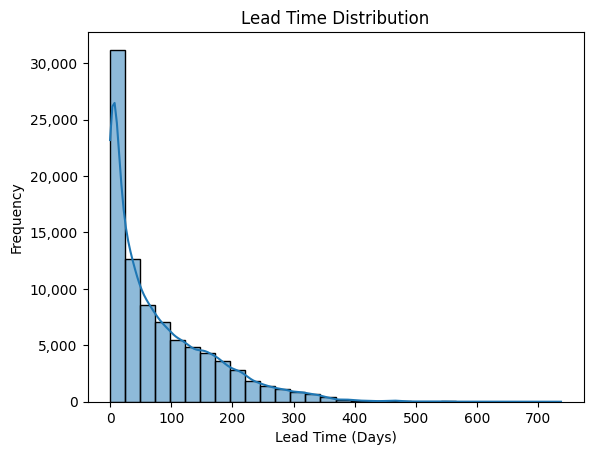

In [25]:
sns.histplot(df['lead_time'], bins=30, kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma))
plt.show()

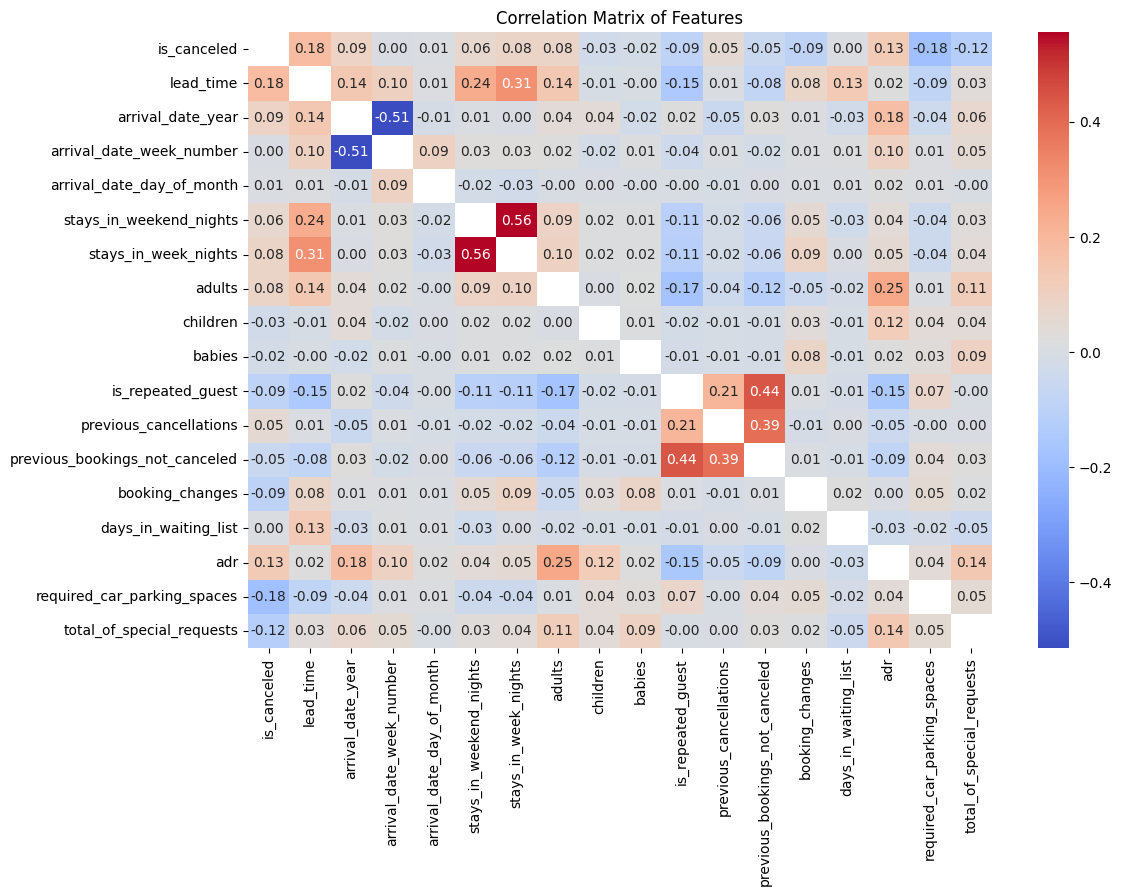

In [26]:
corr = df.corr(numeric_only = True)  #1 = perfect correlation , 0 = no correlation, -1 = negative correlation
for i in range (corr.shape[0]):
    corr.iloc[i, i] = None

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

Some of the biggest correlations to me look like if you are a repeat guest at the hotel, you do not look very likely to cancel your stay. Staying on a weekday has a strong correlation with staying on a weekend day. People probably arrive on friday and stay over the weekend, probably when travelling for a vacation. It also would appear that the week of arrival has the biggest negative correlation, which would indicate that hotels were popular in the start of the later years and the end of the earlier years. Probably doesn't mean that much if the dataset only goes from say August 2015 to March 2017

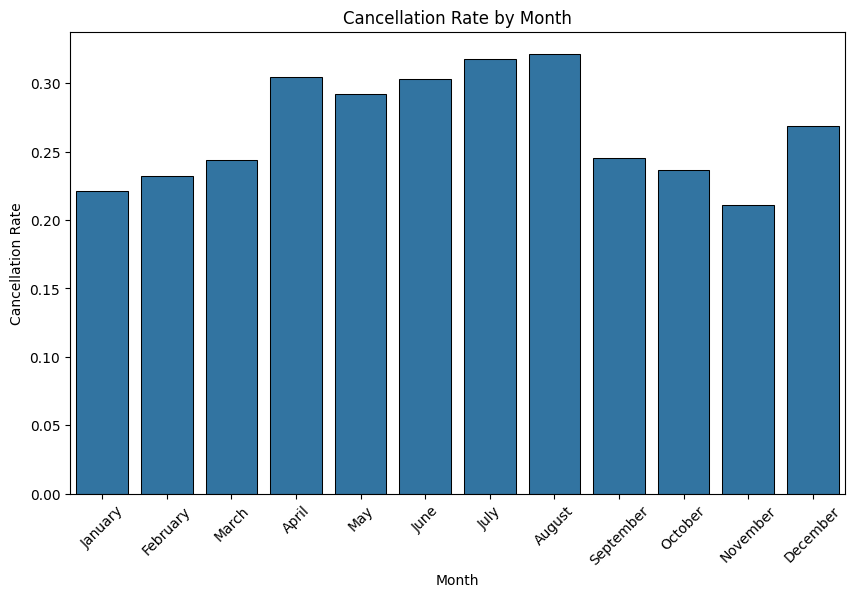

In [27]:
df['arrival_date_month'] = df['arrival_date_month'].str.strip() #There was more whitespace again ('July               ')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))
sns.barplot(x='arrival_date_month', y='is_canceled', data=df, errorbar=None, order=month_order, edgecolor='black', linewidth=0.75)
plt.title('Cancellation Rate by Month')
plt.xlabel('Month')
plt.xticks(rotation = 45)
plt.ylabel('Cancellation Rate')
plt.show()

Looks like cancelling is most prevalent in the summer.

In [28]:
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

months_groups = [group['is_canceled'].values for name, group in df.groupby('arrival_date_month', observed=False)]

f_statistic, p_value = stats.f_oneway(*months_groups)

print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 58.51
P-value: 0.0000


These results suggest there is a statistically significant difference in cancellation rates across different months, which would confirm what the bar chart is showing above.

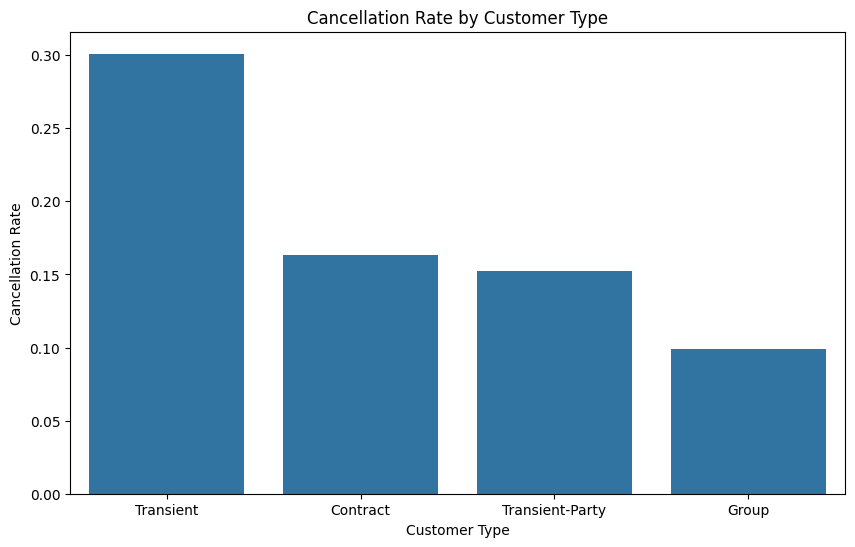

In [29]:
df['customer_type'] = df['customer_type'].str.strip()

plt.figure(figsize=(10, 6))
sns.barplot(x='customer_type', y='is_canceled', data=df, errorbar=None)
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.show()

In [30]:
customer_groups = [group['is_canceled'].values for name, group in df.groupby('customer_type', observed=False)]

f_statistic, p_value = stats.f_oneway(*customer_groups)

print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 478.08
P-value: 0.0000


This indicates there is a statistically significant difference in the customer types when it comes to cancellations

The data so far suggests that transient customers are most likley to cancel, and cancellations are most likely to occur in the summer. Additionally, repeat customers do not seem likely to cancel their bookings compared to first time guests.

## Recomendations

Here would be some recommendations for the hotel to minimize revenune loss:

Offer incentives for booking in advance such as discounts, perks, or credit card offers (like how airlines do bonus miles) to increase lead time and reduce cancellations.

For repeat guests, create loyalty programs or special offers to encourage return bookings, and be secure in the knowledge that they are unlikely to cancel.

Implement dynamic pricing strategies during peak cancellation months (summer) to compensate for potential revenue loss due to cancellations.

Cancellation Policy: 
* Implement stricter cancellation policies or a deposit requirement for transient bookings.
* For repeat guests, have a more lenient policy to encourage future bookings and show that the hotel is flexible. These customers are unlikly to cancel anyway so the few that end up cancelling shoulnd't make that much of an impact compared to the additional stays this lenient policy might encourage.

Communication:
* Send reminders and helpful information (like local events or weather forecasts) to transient guests closer to their arrival dates. This can reduce cancellations by reinforcing their commitment to stay.
* For repeat guests, send personalized communications with special offers and updates tailored to them.

Conduct surveys or gather feedback from transient customers to identify factors influencing their cancellation decisions.

Since summer months have high cancellation rates, consider special events or promotions that encourage commitment, such as summer package deals or family-oriented activities.

Build a Predictive Model:
* Use the data to create a predictive model that estimates cancellation likelihood.

Let's actually build that model now -->

## Predictive Model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from lightgbm import LGBMClassifier

In [32]:
x = df[['lead_time', 'customer_type', 'adr', 'previous_cancellations', 'is_repeated_guest', 'total_of_special_requests', 'arrival_date_month', 'stays_in_weekend_nights',\
         'stays_in_week_nights','adults', 'children', 'babies', 'days_in_waiting_list', 'reserved_room_type', 'booking_changes']].copy()
y = df['is_canceled'].copy()

In [33]:
x[['lead_time', 'customer_type', 'adr', 'previous_cancellations', 'is_repeated_guest', 'total_of_special_requests', 'arrival_date_month', 'stays_in_weekend_nights',\
         'stays_in_week_nights','adults', 'children', 'babies', 'days_in_waiting_list', 'reserved_room_type', 'booking_changes']].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 87370 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   lead_time                  87370 non-null  int16   
 1   customer_type              87370 non-null  object  
 2   adr                        87370 non-null  float32 
 3   previous_cancellations     87370 non-null  int8    
 4   is_repeated_guest          87370 non-null  int8    
 5   total_of_special_requests  87370 non-null  int8    
 6   arrival_date_month         87370 non-null  category
 7   stays_in_weekend_nights    87370 non-null  int8    
 8   stays_in_week_nights       87370 non-null  int8    
 9   adults                     87370 non-null  int8    
 10  children                   87370 non-null  int8    
 11  babies                     87370 non-null  int8    
 12  days_in_waiting_list       87370 non-null  int16   
 13  reserved_room_type         87370 no

In [34]:
x['customer_type'] = x['customer_type'].astype('category')
x['reserved_room_type'] = x['reserved_room_type'].astype('category')
x['arrival_date_month'] = x['arrival_date_month'].astype('category')
x.dtypes

lead_time                       int16
customer_type                category
adr                           float32
previous_cancellations           int8
is_repeated_guest                int8
total_of_special_requests        int8
arrival_date_month           category
stays_in_weekend_nights          int8
stays_in_week_nights             int8
adults                           int8
children                         int8
babies                           int8
days_in_waiting_list            int16
reserved_room_type           category
booking_changes                  int8
dtype: object

Needed to check the data types to know how to transform the data in the preprocessor. Categorical data needs to be converted to number format so the computer can understand it. For example, we need to convert room type from a string (a, b, c, d, f) to a number -->

| Room Type |
|-----------|
| a         |
| b         |
| c         |
| a         |
| d         |
| f         |
| c         |

Once encoded, the table will look like this instead:

| a | b | c | d | f |
|---|---|---|---|---|
| 1 | 0 | 0 | 0 | 0 |
| 0 | 1 | 0 | 0 | 0 |
| 0 | 0 | 1 | 0 | 0 |
| 1 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 1 | 0 |
| 0 | 0 | 0 | 0 | 1 |
| 0 | 0 | 1 | 0 | 0 |


In [35]:
seed = int(time.time())
print(f"The seed for the random state that was used was: {seed}.")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

The seed for the random state that was used was: 1730160954.


In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['lead_time', 'adr', 'previous_cancellations', 
                                 'is_repeated_guest', 'total_of_special_requests', 
                                 'stays_in_weekend_nights', 'stays_in_week_nights', 
                                 'adults', 'children', 'babies', 'days_in_waiting_list']),
        
        ('cat', OneHotEncoder(), ['customer_type', 'arrival_date_month', 'reserved_room_type'])
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [37]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['lead_time', 'adr',
                                                   'previous_cancellations',
                                                   'is_repeated_guest',
                                                   'total_of_special_requests',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'days_in_waiting_list']),
                                                 ('cat', OneHotEncoder(),
                                                  ['customer_type',
                                                   'arrival_date_month',
                                                   'reserved_room_type'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [38]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Model accuracy: 0.74
Confusion Matrix:
[[12108   548]
 [ 3916   902]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.84     12656
           1       0.62      0.19      0.29      4818

    accuracy                           0.74     17474
   macro avg       0.69      0.57      0.57     17474
weighted avg       0.72      0.74      0.69     17474



In [39]:
zcount = 0
ocount = 0
for item in y_pred:
    if item == 0:
        zcount+=1
    elif item == 1:
        ocount+=1

print(f"There are {zcount} zeros and {ocount} ones")


There are 16024 zeros and 1450 ones


Looks like the model is working. There does seem to be a bit of a class imbalance, as the training set has much more noncancllations than cancellations. Here's why this can by bad:
1. **Accuracy (75%):**
This overall accuracy aligns closely with the baseline (predicting "no cancellation" every time), so it’s not particularly impressive on its own given the imbalance in the data.

2. **Class-Specific Performance: Cancellations (Class 1):**
Precision of 63% for cancellations is relatively high, meaning that when the model predicts a cancellation, it’s correct 63% of the time. This is reasonably good, as it reduces the likelihood of false alarms.
Recall for cancellations, however, is only 20%, indicating that the model misses a large portion of actual cancellations. In practice, this means that the model is failing to catch about 80% of the true cancellations, which can be problematic if identifying cancellations is important for planning and inventory management.

3. **Class-Specific Performance: Non-Cancellations (Class 0):**
Precision is 76% and recall is 96%, which shows that the model is very good at correctly identifying non-cancellations and rarely mislabels a non-cancellation as a cancellation. This is beneficial for keeping false positives low but doesn’t help much in identifying the cancellations effectively.

4. **F1-Score:**
For cancellations (class 1), the F1-score is low at 0.31, suggesting that the balance between precision and recall is not optimal for the minority class.
The overall weighted average F1-score of 0.70 suggests that, while the model performs better for the noncancellation class, it struggles to perform well for cancellations.

5. **Macro vs. Weighted Averages:**
The macro average (simple mean across classes) of precision and recall is lower than the weighted average. This suggests that performance on the cancellation class is bringing down the model’s overall effectiveness, even though it appears better when weighted by the more frequent class (non-cancellations).

So beacuse of this imbalance, let's try this again using LGBM, which should help fix any problems caused by the imbalance.

## Updated Model

In [40]:
seed = int(time.time())
print(f"The seed for the random state that was used was: {seed}.")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

The seed for the random state that was used was: 1730160954.


This next block is needed so that I know what to set as the value for scale_pos_wieght in the LGBM model.

scale_pos_weight = $\frac{Number of Positive Samples}{Number of Negative Samples}$


In [41]:
from collections import Counter

class_counts = Counter(y_train)
negative_class_count = class_counts[0]
positive_class_count = class_counts[1]

scale_pos_weight = negative_class_count / positive_class_count
print(f"Calculated scale_pos_weight: {scale_pos_weight:.3f}")


Calculated scale_pos_weight: 2.642


In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['lead_time', 'adr', 'previous_cancellations', 
                                   'is_repeated_guest', 'total_of_special_requests', 
                                   'stays_in_weekend_nights', 'stays_in_week_nights', 
                                   'adults', 'children', 'babies', 'days_in_waiting_list']),
        ('cat', OneHotEncoder(), ['customer_type', 'arrival_date_month', 'reserved_room_type'])
    ]
)

lgbm_model = LGBMClassifier(
    learning_rate=0.05,
    n_estimators=1000,
    max_depth=10,
    scale_pos_weight=2.642,          #This handles the imbalance
    random_state=seed
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgbm_model)
])

In [43]:
model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 19192, number of negative: 50704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 69896, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.274579 -> initscore=-0.971511
[LightGBM] [Info] Start training from score -0.971511
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['lead_time', 'adr',
                                                   'previous_cancellations',
                                                   'is_repeated_guest',
                                                   'total_of_special_requests',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'days_in_waiting_list']),
                                                 ('cat', OneHotEncoder(),
                                                  ['customer_type',
                                                   'arrival_date_month',
                                                   'reserved_room_type'])])),
                ('classifier',
                 LGBMClassifier(learning_rate=0.05, max_depth=10,
                                n_estimators=1000, random_state=1730160954,
                                scale_pos_weight=2.642))])

In [44]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Model accuracy: 0.73
Confusion Matrix:
[[9354 3302]
 [1386 3432]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80     12656
           1       0.51      0.71      0.59      4818

    accuracy                           0.73     17474
   macro avg       0.69      0.73      0.70     17474
weighted avg       0.77      0.73      0.74     17474



Even though some of these items like accuracy and precision for class 1 are down, the rest are up so overall this model seems to be an improvement. Especially since it is better to capture more true positives than to minimize false positives, which this improved model does.

In [45]:
#Example prediction
new_data = pd.DataFrame(
    {
    'lead_time': [15],
    'customer_type': ['Transient'],
    'adr': [100],
    'stays_in_weekend_nights': [1],
    'stays_in_week_nights': [2],
    'total_of_special_requests': [0],
    'arrival_date_month': ['November'],
    'days_in_waiting_list': [2],
    'babies': [0],
    'is_repeated_guest':[0],
    'reserved_room_type':['C'],
    'children':[1],
    'previous_cancellations':[0],
    'adults': [2]
    }
)


predicted_cancellation = model.predict(new_data)
print("Predicted cancellation (1 = Yes, 0 = No):", predicted_cancellation[0])


Predicted cancellation (1 = Yes, 0 = No): 0
